# **Ejercicios Outliers**

### 1. Cargar los datos (trainmod).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Cargar el dataset
data = pd.read_csv("trainmod.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Seleccionar los datos numéricos.

In [4]:
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

In [5]:
# Mostrar las primeras filas del subset numérico
numerical_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Reforma
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,6
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,36
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,8


In [6]:
# Contar todas las columnas numéricas (int y float)
numerical_columns = data.select_dtypes(include=['number'])
num_numerical = numerical_columns.shape[1]

# Contar columnas de tipo int
int_columns = data.select_dtypes(include=['int'])
num_int = int_columns.shape[1]

# Contar columnas de tipo float
float_columns = data.select_dtypes(include=['float'])
num_float = float_columns.shape[1]

# Imprimir los resultados
print(f"Total de columnas numéricas: {num_numerical}")
print(f"Total de columnas tipo int: {num_int}")
print(f"Total de columnas tipo float: {num_float}")

Total de columnas numéricas: 39
Total de columnas tipo int: 36
Total de columnas tipo float: 3


### 3. Realizar un boxplot de dichos datos.

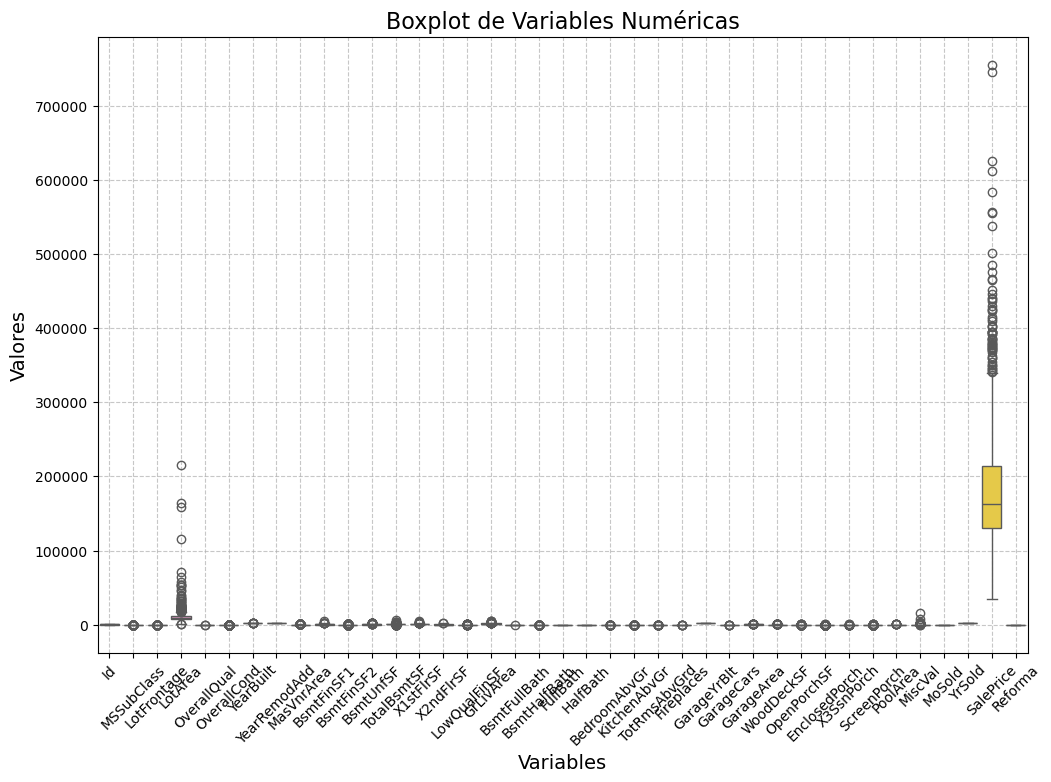

In [7]:
# Crear el boxplot con seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data, palette="Set2")
plt.title("Boxplot de Variables Numéricas", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas si son muchas columnas
plt.grid(True, linestyle="--", alpha=0.7)  # Personalizar la cuadrícula
plt.show()

### 4. Determinar qué datos son realmente numéricos y pueden tener outliers y cuales son categóricos, aunque con forma numérica y repetir el boxplot.

In [8]:
# 1. Variables categóricas basadas en la descripción
# Lista de variables categóricas según archivo de descripción
categorical_from_description = [
    "MSSubClass", "OverallQual", "OverallCond", "MoSold", "YrSold"
]

In [9]:
# 2. Detectar posibles categóricas por cardinalidad
categorical_by_cardinality = []
threshold = 20  # Número máximo de valores únicos para considerar una variable como categórica

for column in numerical_data.columns:
    unique_values = numerical_data[column].nunique()
    if unique_values < threshold:
        categorical_by_cardinality.append(column)

In [10]:
# Unificar ambas listas
categorical_candidates = list(set(categorical_from_description + categorical_by_cardinality))

# Confirmar variables numéricas reales excluyendo categóricas
numerical_candidates = [
    col for col in numerical_data.columns if col not in categorical_candidates
]

In [11]:
# 3. Imprimir resultados
print("\nVariables categóricas finales (numéricas en apariencia):", categorical_candidates)
print("\nVariables numéricas finales (reales):", numerical_candidates)


Variables categóricas finales (numéricas en apariencia): ['BsmtHalfBath', 'PoolArea', 'YrSold', 'HalfBath', 'OverallQual', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'TotRmsAbvGrd', 'FullBath', 'OverallCond', 'MSSubClass', 'BedroomAbvGr', 'BsmtFullBath']

Variables numéricas finales (reales): ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'Reforma']


In [12]:
categorical_candidates

['BsmtHalfBath',
 'PoolArea',
 'YrSold',
 'HalfBath',
 'OverallQual',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'TotRmsAbvGrd',
 'FullBath',
 'OverallCond',
 'MSSubClass',
 'BedroomAbvGr',
 'BsmtFullBath']

In [13]:
numerical_candidates

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'X1stFlrSF',
 'X2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'X3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice',
 'Reforma']

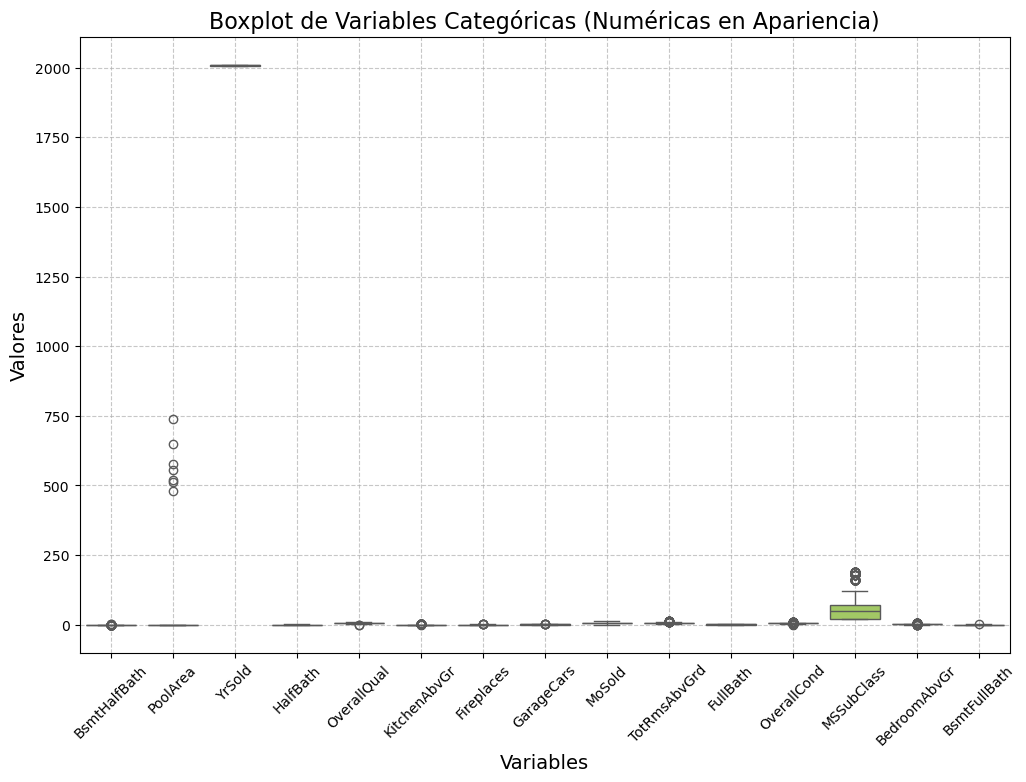

In [14]:
# Boxplot para variables categóricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data[categorical_candidates], palette="Set2")
plt.title("Boxplot de Variables Categóricas (Numéricas en Apariencia)", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

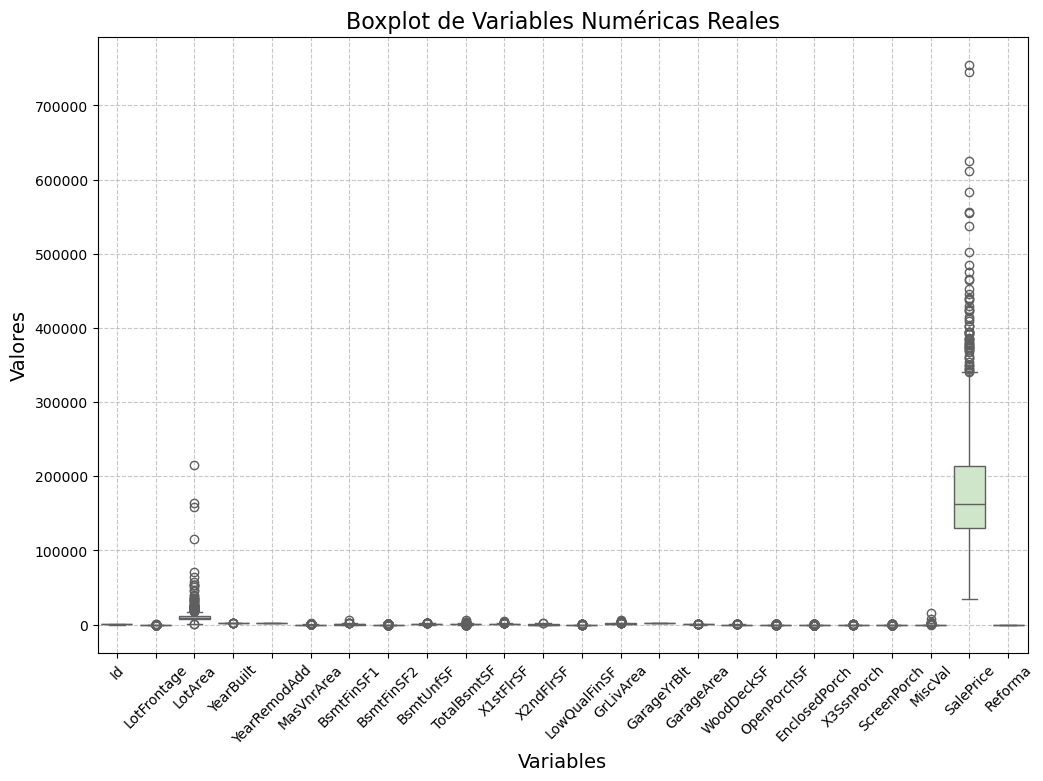

In [15]:
# Boxplot para variables numéricas reales
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data[numerical_candidates], palette="Set3")
plt.title("Boxplot de Variables Numéricas Reales", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### 5. Excluir variables distorsionantes y repetir el boxplot.

In [16]:
# Excluir variables distorsionantes (puedes personalizar la lista según el análisis previo)
distorting_variables = ["Id", "PoolArea", "MSSubClass", "YrSold", "LotArea", "SalePrice", "MiscVal"] 
numerical_data_filtered = numerical_data.drop(columns=distorting_variables, errors="ignore")

In [17]:
# 2. Detectar posibles categóricas por cardinalidad
categorical_by_cardinality = []
threshold = 20  # Número máximo de valores únicos para considerar una variable como categórica

for column in numerical_data_filtered.columns:
    unique_values = numerical_data_filtered[column].nunique()
    if unique_values < threshold:
        categorical_by_cardinality.append(column)

In [18]:
# Unificar ambas listas
categorical_candidates = list(set(categorical_by_cardinality))

# Confirmar variables numéricas reales excluyendo categóricas
numerical_candidates = [
    col for col in numerical_data_filtered.columns if col not in categorical_candidates
]

In [19]:
# 3. Imprimir resultados
print("\nVariables categóricas finales (numéricas en apariencia):", categorical_candidates)
print("\nVariables numéricas finales (reales):", numerical_candidates)


Variables categóricas finales (numéricas en apariencia): ['BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'MoSold', 'TotRmsAbvGrd', 'OverallCond', 'OverallQual', 'BedroomAbvGr', 'FullBath']

Variables numéricas finales (reales): ['LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'Reforma']


In [20]:
numerical_candidates 

['LotFrontage',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'X1stFlrSF',
 'X2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'X3SsnPorch',
 'ScreenPorch',
 'Reforma']

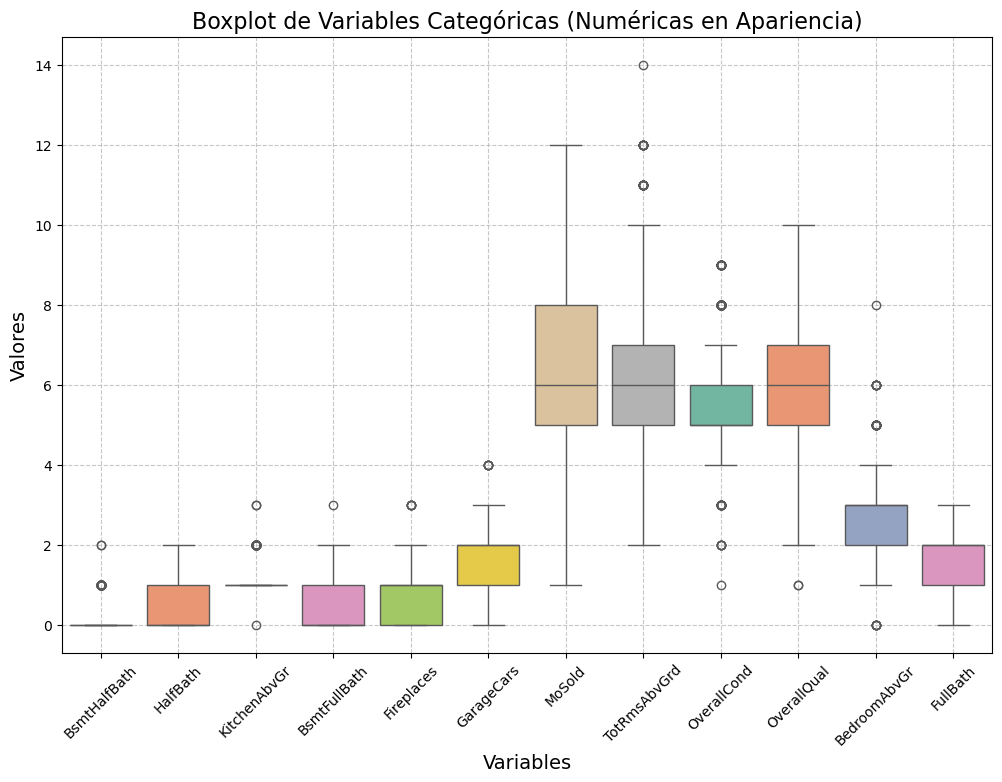

In [21]:
# Boxplot para variables categóricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data_filtered[categorical_candidates], palette="Set2")
plt.title("Boxplot de Variables Categóricas (Numéricas en Apariencia)", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

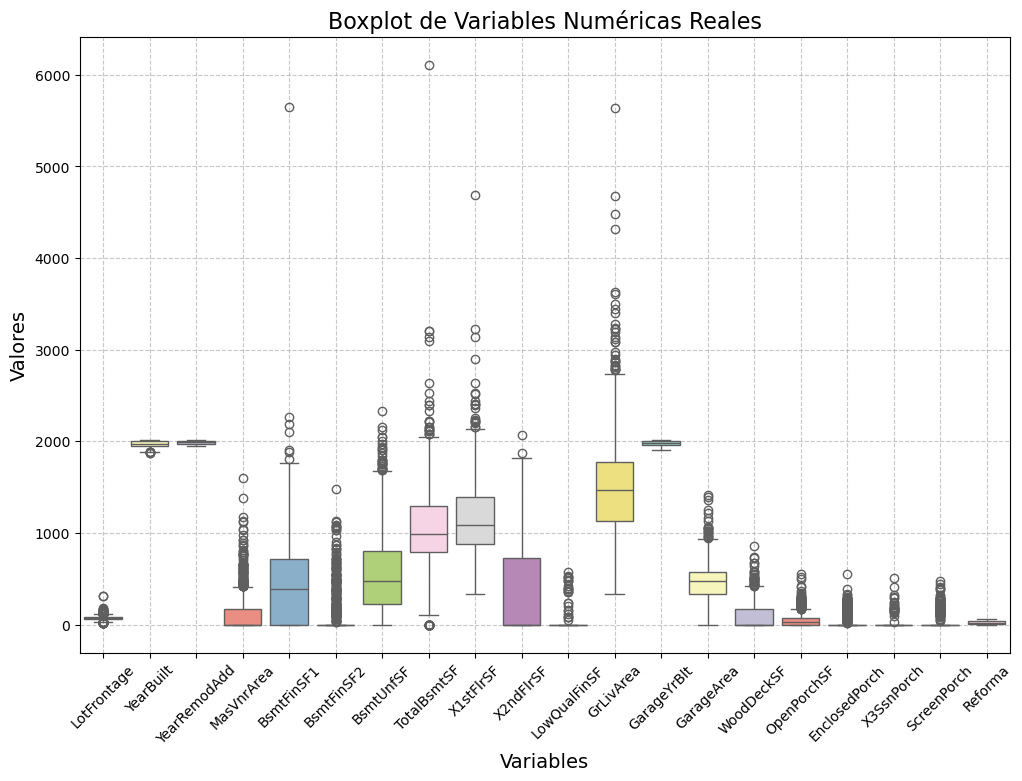

In [22]:
# Boxplot para variables numéricas reales
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data[numerical_candidates], palette="Set3")
plt.title("Boxplot de Variables Numéricas Reales", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [23]:
len(numerical_candidates)

20

In [24]:
#####
data.YearBuilt
data.YearRemodAdd
data.GarageYrBlt
#####
data.BsmtFinSF1
data.BsmtFinSF2
data.BsmtUnfSF
data.TotalBsmtSF
#####
data.LotFrontage
data.MasVnrArea
data.GrLivArea
data.GarageArea
data.WoodDeckSF
data.OpenPorchSF
data.EnclosedPorch
data.X3SsnPorch
data.ScreenPorch
#####
data.X1stFlrSF
data.X2ndFlrSF
data.LowQualFinSF
#####
data.Reforma
#####

0        5
1       31
2        6
3       36
4        8
        ..
1455     7
1456    22
1457     4
1458    14
1459    43
Name: Reforma, Length: 1460, dtype: int64

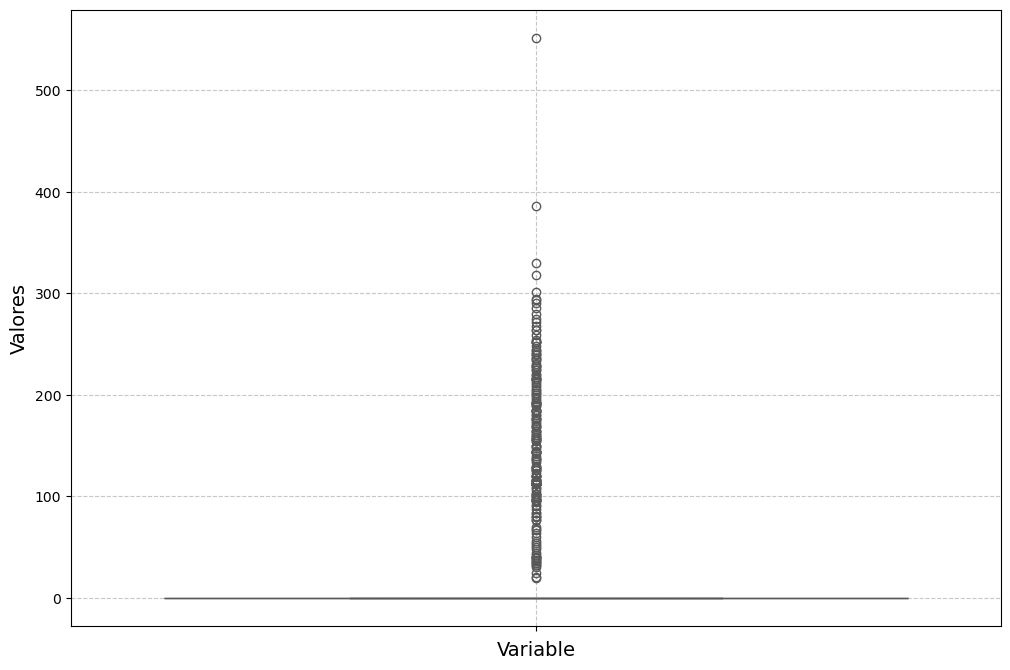

In [25]:
# Boxplot para variables categóricas
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data["EnclosedPorch"], palette="Set2")
plt.xlabel("Variable", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### 6. Realizar el boxplot por grupos y en caso de ser necesario eliminar o modificar alguna variable hasta extraer conclusiones fiables.

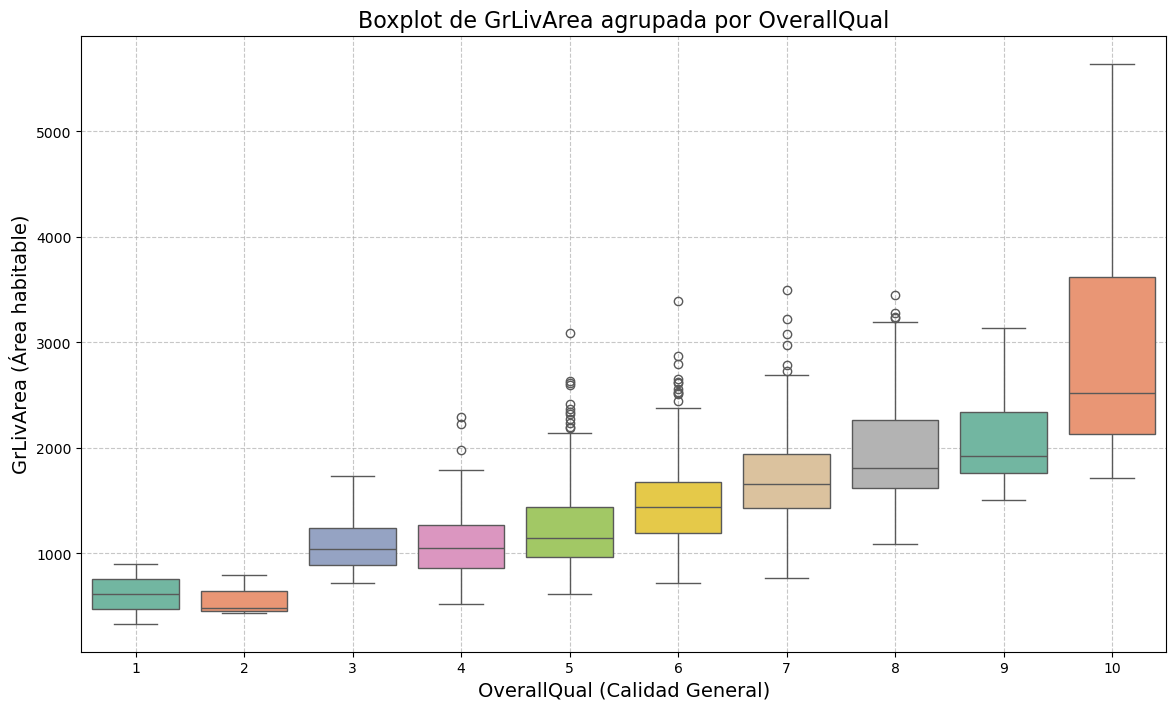

In [26]:
# Graficar un boxplot por grupos, seleccionando una variable específica
plt.figure(figsize=(14, 8))
sns.boxplot(
    x=data["OverallQual"],  # Variable categórica para agrupar
    y=data["GrLivArea"],    # Variable numérica a analizar
    palette="Set2"
)
plt.title("Boxplot de GrLivArea agrupada por OverallQual", fontsize=16)
plt.xlabel("OverallQual (Calidad General)", fontsize=14)
plt.ylabel("GrLivArea (Área habitable)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


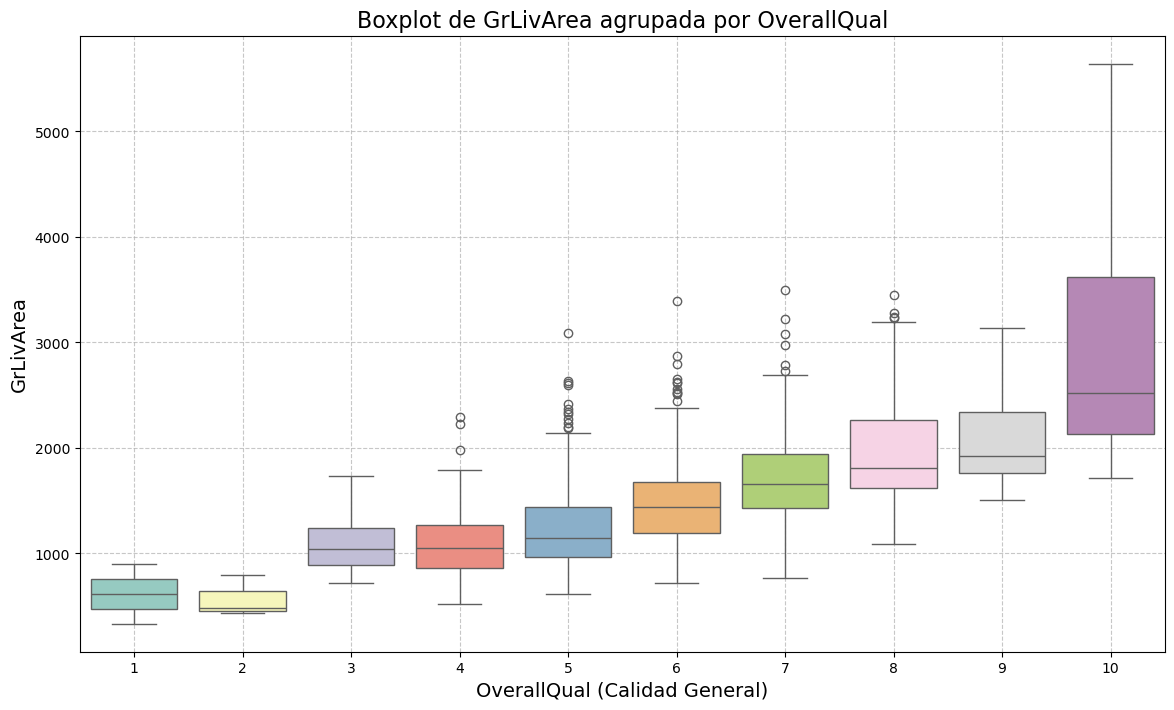

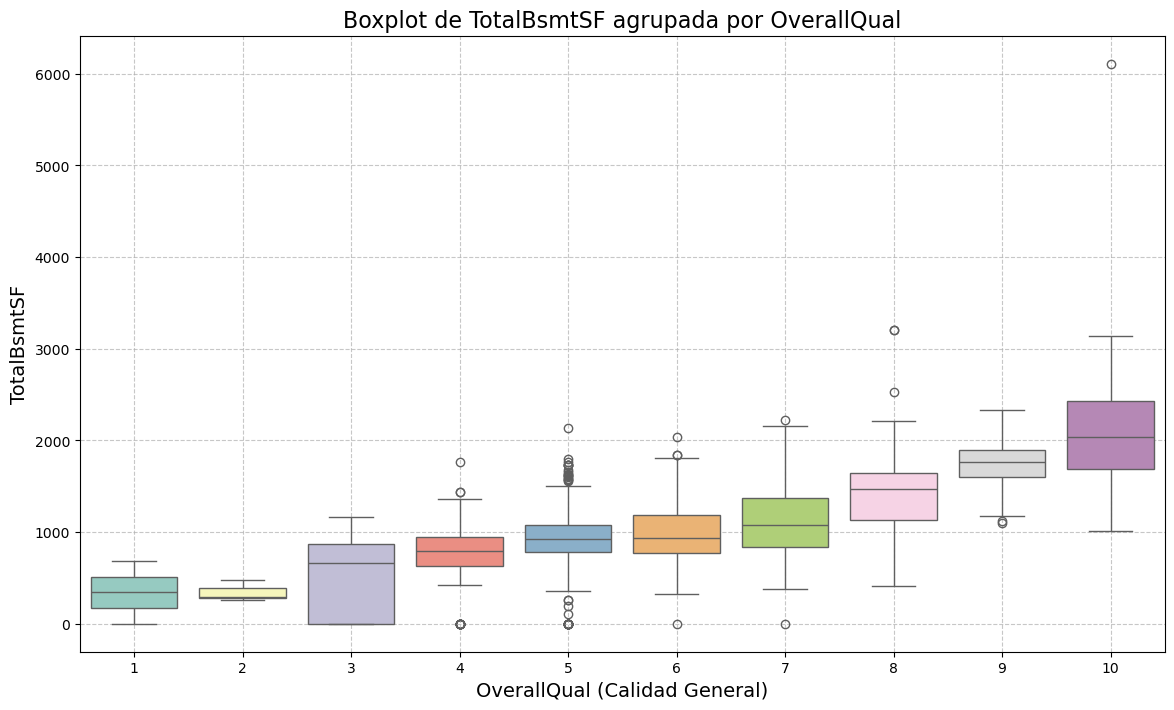

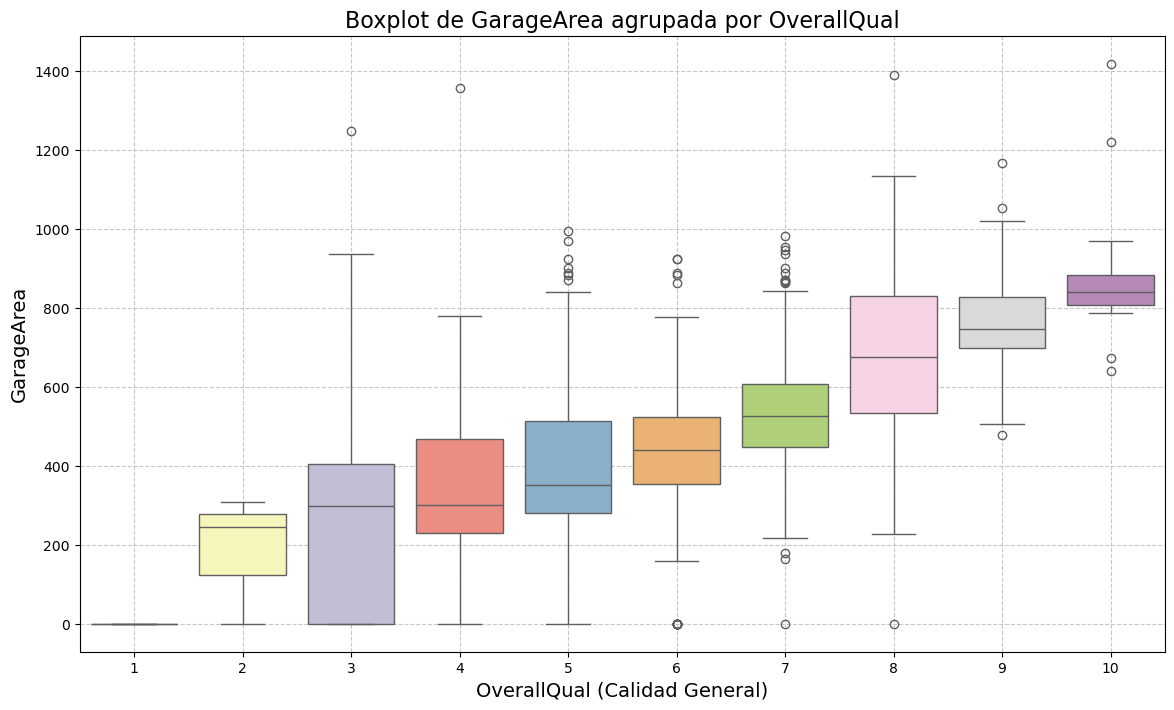

In [27]:
# Variables numéricas que deseas analizar
numerical_vars = ["GrLivArea", "TotalBsmtSF", "GarageArea"]  # Ejemplo de variables numéricas

# Crear un boxplot para cada variable numérica
for var in numerical_vars:
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        x=data["OverallQual"],  # Variable categórica para agrupar
        y=data[var],            # Variable numérica a analizar
        palette="Set3"
    )
    plt.title(f"Boxplot de {var} agrupada por OverallQual", fontsize=16)
    plt.xlabel("OverallQual (Calidad General)", fontsize=14)
    plt.ylabel(var, fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


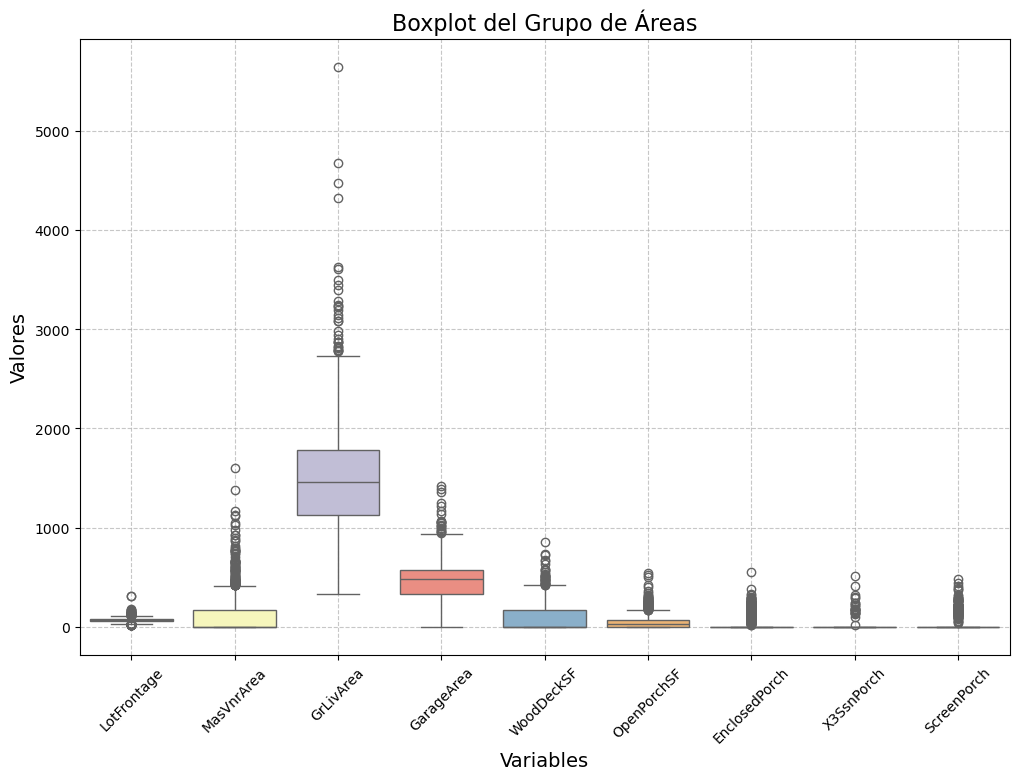

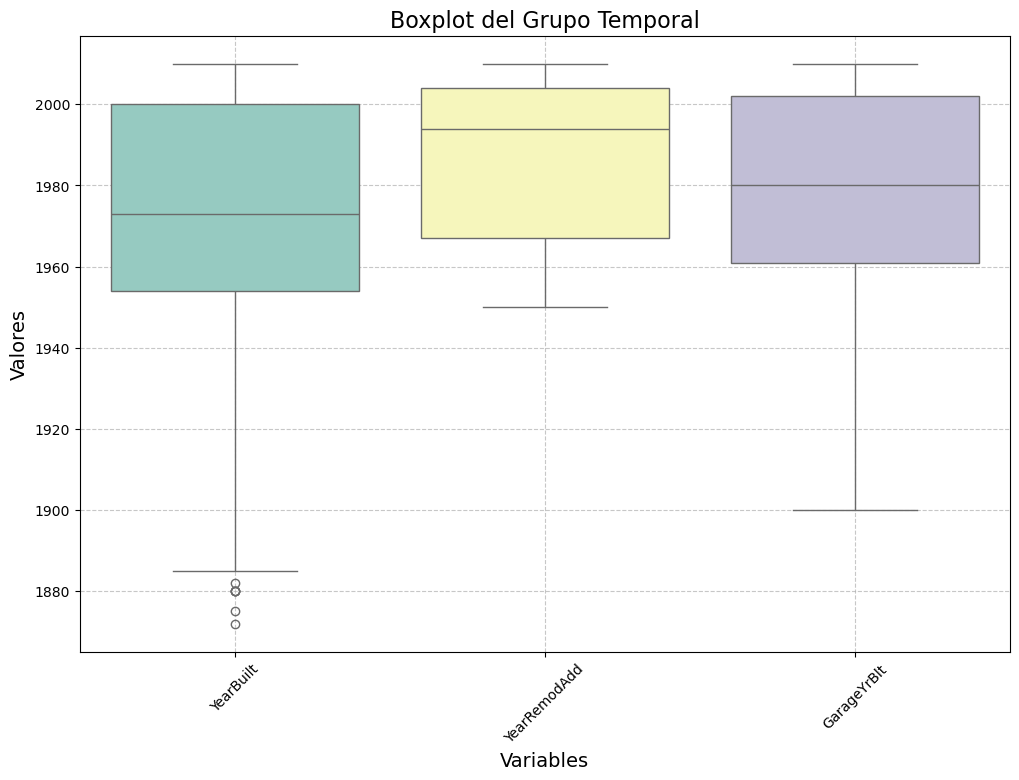

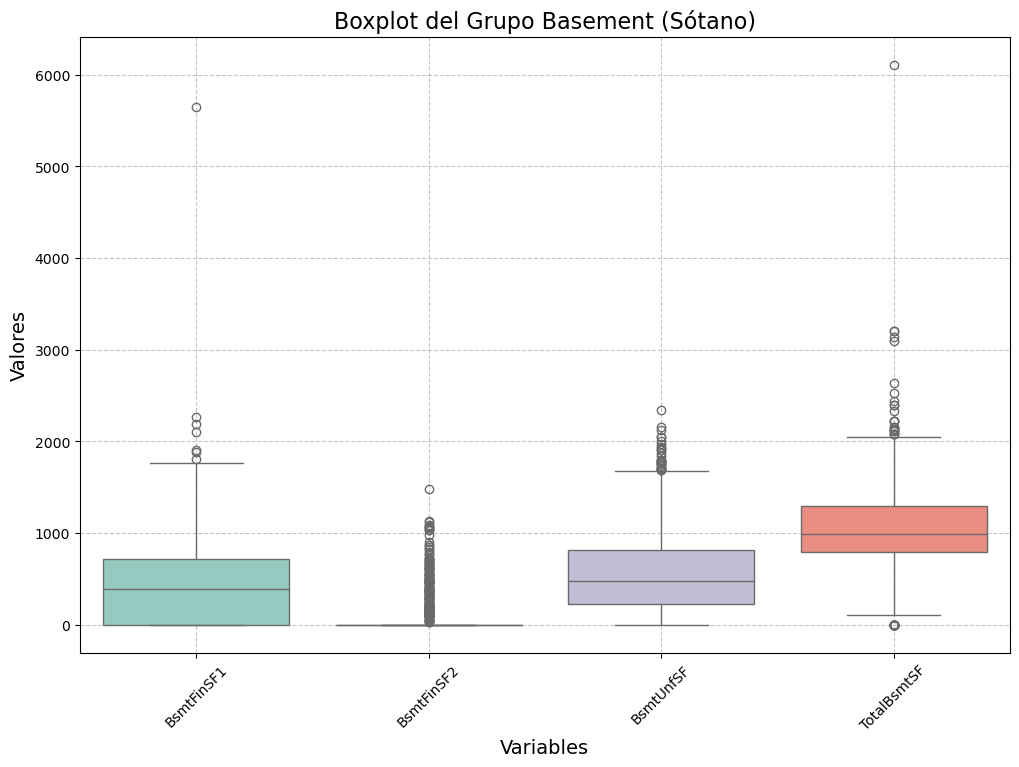

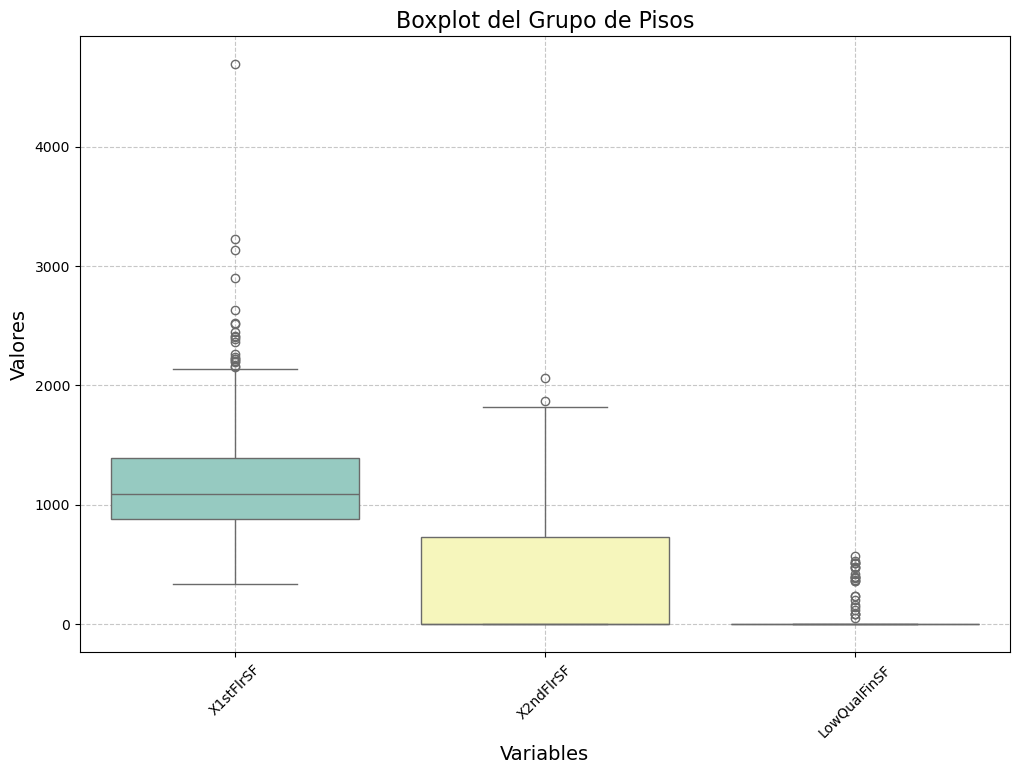

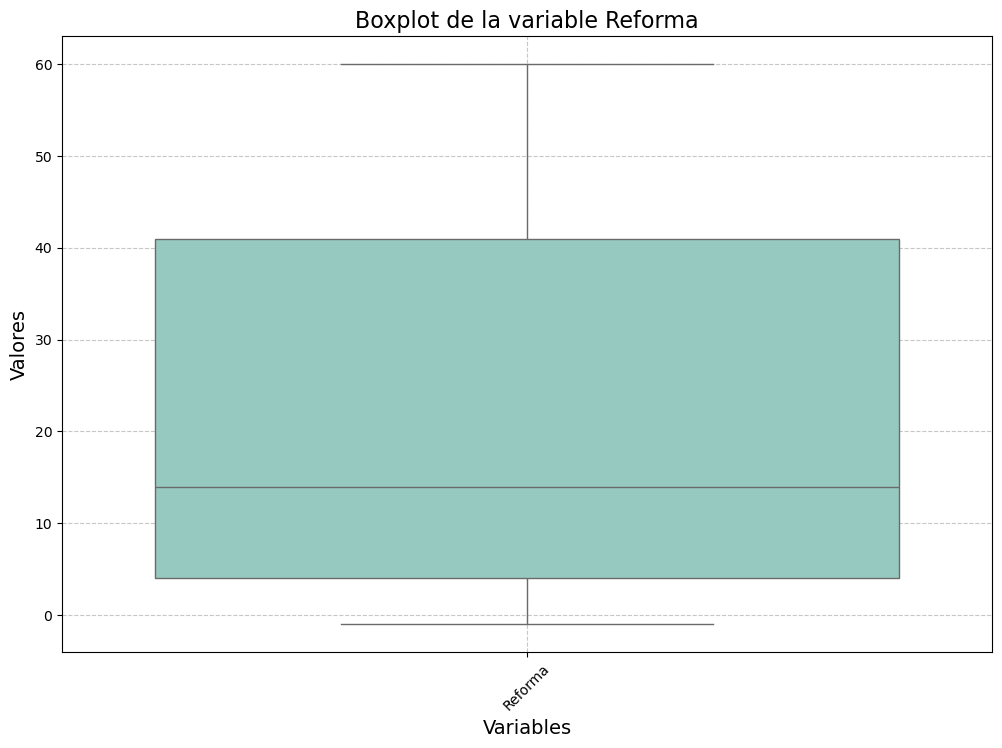

--- Estadísticas descriptivas por grupo ---

Grupo de Áreas:
       LotFrontage   MasVnrArea    GrLivArea   GarageArea   WoodDeckSF  \
count  1201.000000  1452.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   103.685262  1515.463699   472.980137    94.244521   
std      24.284752   181.066207   525.480383   213.804841   125.338794   
min      21.000000     0.000000   334.000000     0.000000     0.000000   
25%      59.000000     0.000000  1129.500000   334.500000     0.000000   
50%      69.000000     0.000000  1464.000000   480.000000     0.000000   
75%      80.000000   166.000000  1776.750000   576.000000   168.000000   
max     313.000000  1600.000000  5642.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch   X3SsnPorch  ScreenPorch  
count  1460.000000    1460.000000  1460.000000  1460.000000  
mean     46.660274      21.954110     3.409589    15.060959  
std      66.256028      61.119149    29.317331    55.757415  
min       0.000000      

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables seleccionadas
selected_columns = [
    'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'Reforma'
]

# Cargar los datos
data = pd.read_csv("trainmod.csv")

# Seleccionar solo las columnas relevantes
selected_data = data[selected_columns]

# Definir los grupos
group_areas = ['LotFrontage', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch']
group_temporal = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
group_basement = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
group_floors = ['X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF']
single_var = ['Reforma']


# Crear subsets de cada grupo
areas_data = selected_data[group_areas]
temporal_data = selected_data[group_temporal]
basement_data = selected_data[group_basement]
floors_data = selected_data[group_floors]
reforma_data = selected_data[single_var]

# Gráfica de boxplot para cada grupo
def plot_boxplot(data, title):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, palette="Set3")
    plt.title(title, fontsize=16)
    plt.xlabel("Variables", fontsize=14)
    plt.ylabel("Valores", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Boxplots por grupo
plot_boxplot(areas_data, "Boxplot del Grupo de Áreas")
plot_boxplot(temporal_data, "Boxplot del Grupo Temporal")
plot_boxplot(basement_data, "Boxplot del Grupo Basement (Sótano)")
plot_boxplot(floors_data, "Boxplot del Grupo de Pisos")
plot_boxplot(reforma_data, "Boxplot de la variable Reforma")

# Análisis descriptivo
print("--- Estadísticas descriptivas por grupo ---")
print("\nGrupo de Áreas:")
print(areas_data.describe())
print("\nGrupo Temporal:")
print(temporal_data.describe())
print("\nGrupo Basement (Sótano):")
print(basement_data.describe())
print("\nGrupo de Pisos:")
print(floors_data.describe())


### 7. Determinar en qué observaciones se encuentran los outliers, realizando para ello las modificaciones que sean necesarias.

In [29]:
# Excluimos 'Id' y 'SalePrice' de las variables numéricas reales
cols_outlier = [col for col in numerical_candidates if col not in ["Id", "SalePrice"]]

outliers_dict = {}

for col in cols_outlier:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    mask_outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
    outlier_indices = data[mask_outliers].index.tolist()
    
    if len(outlier_indices) > 0:
        outliers_dict[col] = outlier_indices

# outliers_dict contendrá las columnas como llaves y la lista de índices que tienen outliers como valores
print("Outliers detectados:")
for variable, indices in outliers_dict.items():
    print(f"Variable: {variable}, Cantidad de outliers: {len(indices)}, Índices: {indices[:20]}...")

Outliers detectados:
Variable: LotFrontage, Cantidad de outliers: 88, Índices: [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276]...
Variable: YearBuilt, Cantidad de outliers: 7, Índices: [304, 630, 747, 991, 1132, 1137, 1349]...
Variable: MasVnrArea, Cantidad de outliers: 96, Índices: [25, 37, 56, 58, 64, 70, 80, 81, 82, 104, 105, 109, 115, 151, 159, 161, 169, 173, 178, 180]...
Variable: BsmtFinSF1, Cantidad de outliers: 7, Índices: [53, 70, 178, 523, 898, 1182, 1298]...
Variable: BsmtFinSF2, Cantidad de outliers: 167, Índices: [7, 24, 26, 42, 43, 44, 52, 73, 77, 107, 113, 114, 116, 129, 153, 165, 166, 172, 173, 174]...
Variable: BsmtUnfSF, Cantidad de outliers: 29, Índices: [22, 78, 137, 169, 224, 238, 278, 350, 477, 496, 552, 581, 618, 678, 768, 774, 798, 803, 843, 928]...
Variable: TotalBsmtSF, Cantidad de outliers: 61, Índices: [17, 39, 70, 90, 102, 156, 178, 182, 224, 259, 278, 313, 332, 342, 362, 371, 392, 440, 477, 496]...
Variable: X

### 8. Visualizar las observaciones que tienen outliers de otra forma distinta.

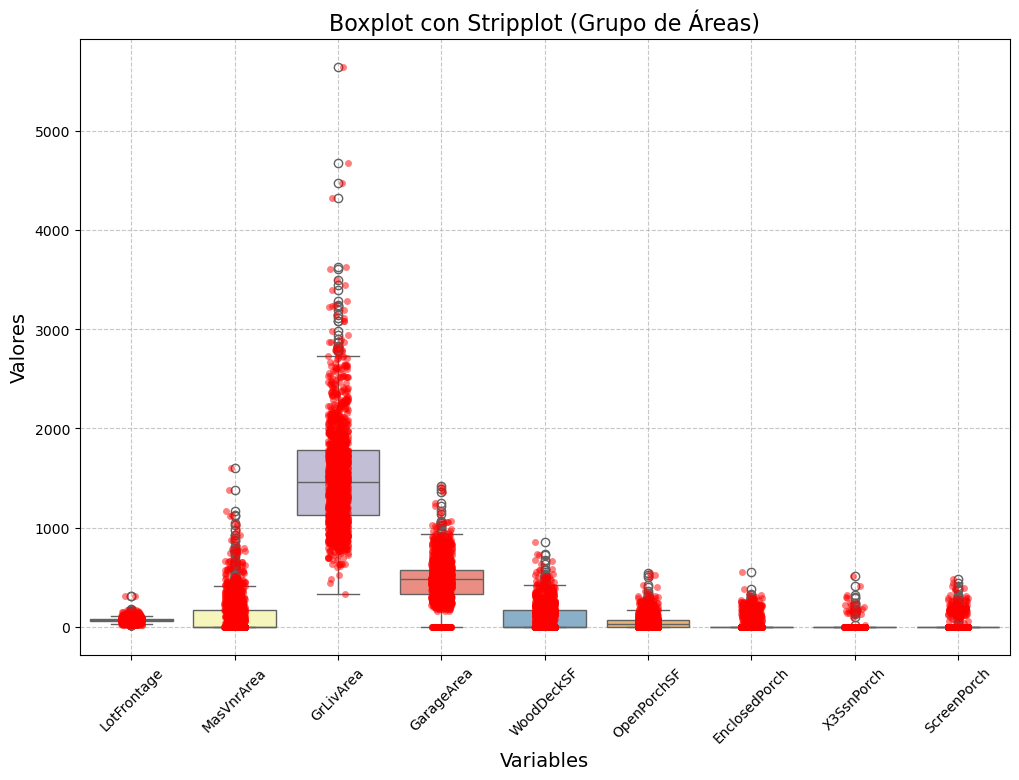

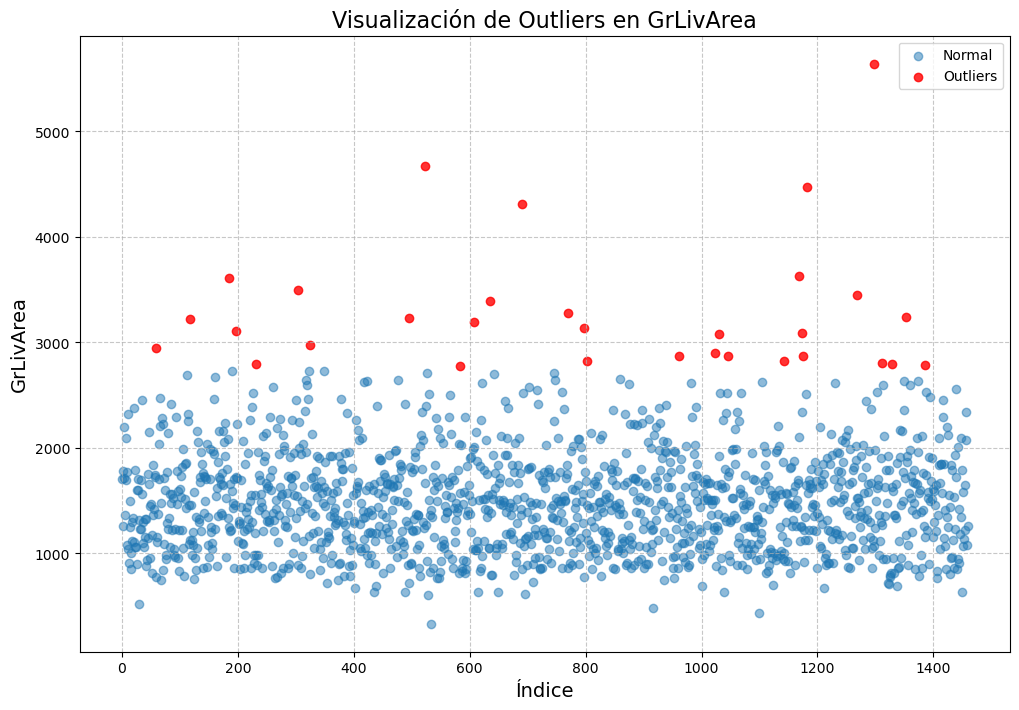

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes definidos areas_data

# Método 1: Boxplot + Stripplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=areas_data, palette="Set3")
sns.stripplot(data=areas_data, color="red", jitter=True, alpha=0.5)
plt.title("Boxplot con Stripplot (Grupo de Áreas)", fontsize=16)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Método 2: Identificación programática de outliers para una variable concreta
col = 'GrLivArea'  # Ejemplo con la variable GrLivArea
Q1 = areas_data[col].quantile(0.25)
Q3 = areas_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = areas_data[(areas_data[col] < lower_bound) | (areas_data[col] > upper_bound)]
non_outliers = areas_data[(areas_data[col] >= lower_bound) & (areas_data[col] <= upper_bound)]

# Scatterplot resaltando outliers
plt.figure(figsize=(12, 8))
plt.scatter(non_outliers.index, non_outliers[col], label='Normal', alpha=0.5)
plt.scatter(outliers.index, outliers[col], color='red', label='Outliers', alpha=0.8)
plt.title(f"Visualización de Outliers en {col}", fontsize=16)
plt.xlabel("Índice", fontsize=14)
plt.ylabel(col, fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### 9. Transformar los outliers en NAs para poder procesarlos posteriormente. Aplicarlo a los datos numéricos (correctos) excepto la “Id” y “SalePrice”.

In [31]:
# Cargar el dataset
data = pd.read_csv("trainmod.csv")

In [32]:
# Contar todas las columnas numéricas (int y float)
numerical_columns = data.select_dtypes(include=['number'])
num_numerical = numerical_columns.shape[1]

# Contar columnas de tipo int
int_columns = data.select_dtypes(include=['int'])
num_int = int_columns.shape[1]

# Contar columnas de tipo float
float_columns = data.select_dtypes(include=['float'])
num_float = float_columns.shape[1]

# Imprimir los resultados
print(f"Total de columnas numéricas: {num_numerical}")
print(f"Total de columnas tipo int: {num_int}")
print(f"Total de columnas tipo float: {num_float}")

# 1. Variables categóricas basadas en la descripción
# Lista de variables categóricas según archivo de descripción
categorical_from_description = [
    "MSSubClass", "OverallQual", "OverallCond", "MoSold", "YrSold"
    # Agrega aquí más variables identificadas como categóricas en el archivo
]

# 2. Detectar posibles categóricas por cardinalidad
categorical_by_cardinality = []
threshold = 20  # Número máximo de valores únicos para considerar una variable como categórica

for column in numerical_data.columns:
    unique_values = numerical_data[column].nunique()
    if unique_values < threshold:
        categorical_by_cardinality.append(column)

    # Unificar ambas listas
categorical_candidates = list(set(categorical_from_description + categorical_by_cardinality))

# Confirmar variables numéricas reales excluyendo categóricas
numerical_candidates = [
    col for col in numerical_data.columns if col not in categorical_candidates
]

# 3. Imprimir resultados
print("\nVariables categóricas finales (numéricas en apariencia):", categorical_candidates)
print("\nVariables numéricas finales (reales):", numerical_candidates)

Total de columnas numéricas: 39
Total de columnas tipo int: 36
Total de columnas tipo float: 3

Variables categóricas finales (numéricas en apariencia): ['BsmtHalfBath', 'PoolArea', 'YrSold', 'HalfBath', 'OverallQual', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'TotRmsAbvGrd', 'FullBath', 'OverallCond', 'MSSubClass', 'BedroomAbvGr', 'BsmtFullBath']

Variables numéricas finales (reales): ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'Reforma']


In [33]:
data[numerical_candidates].isna().sum().sum()

348

In [34]:
# Ejercicio 9 (revisión): Transformar outliers en NaN

data_clean = data.copy()  # Copia del dataset original para no perder datos

for col, indices in outliers_dict.items():
    data_clean.loc[indices, col] = np.nan

# Verificamos la cantidad de NA's generadas
print("Cantidad total de NA después de reemplazar outliers:", data_clean.isna().sum().sum())


Cantidad total de NA después de reemplazar outliers: 7977


In [35]:
# Cargar el dataset
data = pd.read_csv("trainmod.csv")

In [36]:
# Contar todas las columnas numéricas (int y float)
numerical_columns = data.select_dtypes(include=['number'])
num_numerical = numerical_columns.shape[1]

# Contar columnas de tipo int
int_columns = data.select_dtypes(include=['int'])
num_int = int_columns.shape[1]

# Contar columnas de tipo float
float_columns = data.select_dtypes(include=['float'])
num_float = float_columns.shape[1]

# Imprimir los resultados
print(f"Total de columnas numéricas: {num_numerical}")
print(f"Total de columnas tipo int: {num_int}")
print(f"Total de columnas tipo float: {num_float}")

Total de columnas numéricas: 39
Total de columnas tipo int: 36
Total de columnas tipo float: 3


In [37]:
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['number'])

In [38]:
# 1. Variables categóricas basadas en la descripción
categorical_from_description = [
    "MSSubClass", "OverallQual", "OverallCond", "MoSold", "YrSold"
]

In [39]:
# 2. Detectar posibles categóricas por cardinalidad
categorical_by_cardinality = []
threshold = 20  # Número máximo de valores únicos para considerar una variable como categórica

for column in numerical_data.columns:
    unique_values = numerical_data[column].nunique()
    if unique_values < threshold:
        categorical_by_cardinality.append(column)

# Unificar ambas listas
categorical_candidates = list(set(categorical_from_description + categorical_by_cardinality))

# Confirmar variables numéricas reales (excluyendo las categóricas)
numerical_candidates = [
    col for col in numerical_data.columns if col not in categorical_candidates
]

In [40]:
# 3. Imprimir resultados
print("\nVariables categóricas finales (numéricas en apariencia):", categorical_candidates)
print("\nVariables numéricas finales (reales):", numerical_candidates)


Variables categóricas finales (numéricas en apariencia): ['BsmtHalfBath', 'PoolArea', 'YrSold', 'HalfBath', 'OverallQual', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'TotRmsAbvGrd', 'FullBath', 'OverallCond', 'MSSubClass', 'BedroomAbvGr', 'BsmtFullBath']

Variables numéricas finales (reales): ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'Reforma']


In [41]:
# Comprobar NA's en las variables numéricas reales antes de remplazar outliers
print("NA's iniciales en variables numéricas reales:", data[numerical_candidates].isna().sum().sum())

NA's iniciales en variables numéricas reales: 348


In [43]:
data_with_NAs = data.copy()  # Copia del dataset original para no perder datos

# Utilizamos `outliers_dict` que contiene las columnas llaves y la lista de índices que tienen outliers como valores (rescatado del ejercico 7)
for col, indices in outliers_dict.items():
    if col in numerical_candidates:  # Solo si la columna está en las numéricas reales
        data_with_NAs.loc[indices, col] = np.nan

print(f"Número total de datos del dataset: {data.size}")

# Verificamos la cantidad de NA's generadas
print("Cantidad total de NA después de reemplazar outliers:", data_with_NAs.isna().sum().sum())

Número total de datos del dataset: 121180
Cantidad total de NA después de reemplazar outliers: 7977


### 10. Juntar el resto de los datos para volver a crear la tabla con todas las variables.

In [44]:
full_data = data_with_NAs.copy()
print("Dimensiones del DataFrame final:", full_data.shape)

Dimensiones del DataFrame final: (1460, 83)


### 11. Guardar, con un nombre diferente, el data frame que se seleccione.

In [45]:
# Ejercicio 11
full_data.to_csv("trainmod_with_NAs.csv", index=False)
print("El DataFrame procesado se ha guardado como trainmod_with_NAs.csv")

El DataFrame procesado se ha guardado como trainmod_with_NAs.csv
